In [1]:
!pip install -q unsloth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 72.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.4/293.4 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 79.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 23.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.4 MB/s eta 0:00:00


In [2]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import os

# Load the model and tokenizer
model_path = "/kaggle/input/inferencedataset/llama11b"

# Load the model
model, tokenizer = FastVisionModel.from_pretrained(
    model_path,
    load_in_4bit=True,
    use_gradient_checkpointing="unsloth",
)

# Enable gradient checkpointing
model.gradient_checkpointing_enable()

# Verify the model
print(type(model))  # Should output <class 'unsloth.FastVisionModel'>


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.1.6: Fast Mllama vision patching. Transformers: 4.48.1.
   \\   /|    GPU: Tesla T4. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 7.5. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json:   0%|          | 0.00/375k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

<class 'peft.peft_model.PeftModelForCausalLM'>
PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MllamaForConditionalGeneration(
      (vision_model): MllamaVisionModel(
        (patch_embedding): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14), padding=valid, bias=False)
        (gated_positional_embedding): MllamaPrecomputedPositionEmbedding(
          (tile_embedding): Embedding(9, 8197120)
        )
        (pre_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (post_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (layernorm_pre): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (layernorm_post): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (transformer): MllamaVisionEncoder(
          (layers): ModuleList(
            (0-12): 13 x MllamaVisionEncoderLayer(
              (self_at

In [21]:
from transformers import TextStreamer
from PIL import Image
import torch

# Enable the model for inference
model = FastVisionModel.for_inference(model)

# Load the image as a PIL image
image_path = "/kaggle/input/videoframedata/frame_data/frames/BHAIRAB DANCE IN LONDON--IamAbatar--UCfj7fHQkQ5X5ogj8hpXwmJg---4Bkky5pgJg_segment1_clip_2/frame_3.jpg"
image = Image.open(image_path).resize((224, 224))  # Resize the image to 224x224

# Prepare instruction and messages
instruction = """Answer the question based on the content of this image.."""
question = "Which dance is being performed in the video?"

# Prepare the messages in the required format
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": instruction},
            {"type": "image", "image": image},  # Pass the resized PIL image directly
            {"type": "text", "text": question}
        ]
    }
]

# Apply the chat template and tokenize the input
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")


# Define the text streamer
text_streamer = TextStreamer(
    tokenizer=tokenizer,
    skip_prompt=True  # Skip showing the input prompt in the output
)
print(text_streamer)

# Generate the output
with torch.no_grad():  # Disable gradient computation during inference
    _ = model.generate(**inputs, streamer=text_streamer, max_new_tokens=128,
                       use_cache=True, temperature=1.5, min_p=0.1)

The dance being performed in the video is likely a traditional Nepali dance. The video showcases various dancers dressed in colorful costumes. The intricate costumes, movements, and music allude to traditional Nepali dance forms, emphasizing the importance of cultural identity.<|eot_id|>


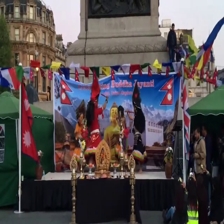

In [22]:
image

In [30]:
# Load the image as a PIL image
image_path = "/kaggle/input/videoframedata/frame_data/frames/Kumari Dance_Charya Nritya_______ _____ 2076_Aloyana dongol_UCB7v02qvayFmzxiddLufw6w_trn6IKdHA_E_segment1_clip_2/frame_3.jpg"
image = Image.open(image_path).resize((224, 224))  # Resize the image to 224x224

# Prepare instruction and messages
instruction = """
Answer the question based on the content of this image. 
"""
question = "What is the vibe of the video?"

# Prepare the messages in the required format
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": instruction},
            {"type": "image", "image": image},  # Pass the resized PIL image directly
            {"type": "text", "text": question}
        ]
    }
]

# Apply the chat template and tokenize the input
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")


# Define the text streamer
text_streamer = TextStreamer(
    tokenizer=tokenizer,
    skip_prompt=True  # Skip showing the input prompt in the output
)
print(text_streamer)

# Generate the output
with torch.no_grad():  # Disable gradient computation during inference
    _ = model.generate(**inputs, streamer=text_streamer, max_new_tokens=128,
                       use_cache=True, temperature=1.5, min_p=0.1)

The video depicts traditional dance forms from Nepal, which is considered to be one of the most important forms of artistic expression in Nepal. These dances are not only for entertainment, but they also convey important messages, which inculcate virtues such as discipline and cooperation. The dance has been an integral part of Nepal's culture for centuries and has been used in both religious and secular contexts. Therefore, the video showcases traditional dance forms of Nepal as an integral part of the country's rich and vibrant cultural heritage, and a great way for the country's residents to express themselves artistically and culturally.<|eot_id|>


In [25]:
# Load the image as a PIL image
image_path = '/kaggle/input/videoframedata/frame_data/frames/-DHIME DANCE AND MUSIC _ Culture Of Newar--Sam Audio Video--S4PcERz4Eio_segment3_clip_1/frame_2.jpg'
image = Image.open(image_path).resize((224, 224))  # Resize the image to 224x224

# Prepare instruction and messages
instruction = """
Answer the question based on the content of this image. 

"""
question = "How many dancers are in the video?"

# Prepare the messages in the required format
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": instruction},
            {"type": "image", "image": image},  # Pass the resized PIL image directly
            {"type": "text", "text": question}
        ]
    }
]

# Apply the chat template and tokenize the input
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")


# Define the text streamer
text_streamer = TextStreamer(
    tokenizer=tokenizer,
    skip_prompt=True  # Skip showing the input prompt in the output
)
print(text_streamer)

# Generate the output
with torch.no_grad():  # Disable gradient computation during inference
    _ = model.generate(**inputs, streamer=text_streamer, max_new_tokens=128,
                       use_cache=True, temperature=1.5, min_p=0.1)

**Number of Dancers:** There are two dancers featured in the video.<|eot_id|>


In [31]:
# Load the image as a PIL image
image_path = '/kaggle/input/videoframedata/frame_data/frames/-_ Newari Dhime baja dance performance at Nyatapola Temple_ Bhaktapur _ Yatra Nepal _ 2080_12_26 _--YATRA NEPAL--vjvXAPeAoYc_segment2_clip_1/frame_4.jpg'
image = Image.open(image_path).resize((224, 224))  # Resize the image to 224x224

# Prepare instruction and messages
instruction = """
Answer the question based on the content of this image. 

"""
question = "What kind of instruments are being used in this video?"

# Prepare the messages in the required format
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": instruction},
            {"type": "image", "image": image},  # Pass the resized PIL image directly
            {"type": "text", "text": question}
        ]
    }
]

# Apply the chat template and tokenize the input
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")


# Define the text streamer
text_streamer = TextStreamer(
    tokenizer=tokenizer,
    skip_prompt=True  # Skip showing the input prompt in the output
)
print(text_streamer)

# Generate the output
with torch.no_grad():  # Disable gradient computation during inference
    _ = model.generate(**inputs, streamer=text_streamer, max_new_tokens=128,
                       use_cache=True, temperature=1.5, min_p=0.1)

There are several instruments being used in the video. These are:

Drums
Cymbals<|eot_id|>


In [32]:
# Load the image as a PIL image
image_path = '/kaggle/input/videoframedata/frame_data/frames/-_ Newari Dhime baja dance performance at Nyatapola Temple_ Bhaktapur _ Yatra Nepal _ 2080_12_26 _--YATRA NEPAL--vjvXAPeAoYc_segment2_clip_1/frame_4.jpg'
image = Image.open(image_path).resize((224, 224))  # Resize the image to 224x224

# Prepare instruction and messages
instruction = """
Answer the question based on the content of this image. 

"""
question = "Where is the setting of this video?"

# Prepare the messages in the required format
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": instruction},
            {"type": "image", "image": image},  # Pass the resized PIL image directly
            {"type": "text", "text": question}
        ]
    }
]

# Apply the chat template and tokenize the input
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")


# Define the text streamer
text_streamer = TextStreamer(
    tokenizer=tokenizer,
    skip_prompt=True  # Skip showing the input prompt in the output
)
print(text_streamer)

# Generate the output
with torch.no_grad():  # Disable gradient computation during inference
    _ = model.generate(**inputs, streamer=text_streamer, max_new_tokens=128,
                       use_cache=True, temperature=1.5, min_p=0.1)

The setting of this video appears to be a vibrant festival in Kathmandu, Nepal, with dancers performing in traditional attire in front of the towering Rato Machindranath temple.<|eot_id|>


In [34]:
# Load the image as a PIL image
image_path = '/kaggle/input/videoframedata/frame_data/frames/BHAIRAB DANCE IN LONDON--IamAbatar--UCfj7fHQkQ5X5ogj8hpXwmJg---4Bkky5pgJg_segment2_clip_2/frame_4.jpg'
image = Image.open(image_path).resize((224, 224))  # Resize the image to 224x224

# Prepare instruction and messages
instruction = """
Answer the question based on the content of this image. 

"""
question = "Who are these masked deties in video?"

# Prepare the messages in the required format
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": instruction},
            {"type": "image", "image": image},  # Pass the resized PIL image directly
            {"type": "text", "text": question}
        ]
    }
]

# Apply the chat template and tokenize the input
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")


# Define the text streamer
text_streamer = TextStreamer(
    tokenizer=tokenizer,
    skip_prompt=True  # Skip showing the input prompt in the output
)
print(text_streamer)

# Generate the output
with torch.no_grad():  # Disable gradient computation during inference
    _ = model.generate(**inputs, streamer=text_streamer, max_new_tokens=128,
                       use_cache=True, temperature=1.5, min_p=0.1)

The masked deities in video are part of a traditional Newar dance, performed in the streets during festivals such as Bhai Tika to ward off evil spirits, showcase artistic skill, and commemorate the gods. They represent the triumph of good over evil and the blessings bestowed by the divine forces on human life.<|eot_id|>


In [36]:
# Load the image as a PIL image
image_path = '/kaggle/input/videoframedata/frame_data/frames/Indra Jatra 2074 _Halchok Bhairav Dance_--Sujit Sind--UC7ObPu4bVxKbJxBdFsnzqSg--7SI3qNlocBw_cut_clip_2/frame_4.jpg'
image = Image.open(image_path).resize((224, 224))  # Resize the image to 224x224

# Prepare instruction and messages
instruction = """
Answer the question based on the content of this image. 

"""
question = "How many masked deties are in the video and what do they represnet?"

# Prepare the messages in the required format
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": instruction},
            {"type": "image", "image": image},  # Pass the resized PIL image directly
            {"type": "text", "text": question}
        ]
    }
]

# Apply the chat template and tokenize the input
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")


# Define the text streamer
text_streamer = TextStreamer(
    tokenizer=tokenizer,
    skip_prompt=True  # Skip showing the input prompt in the output
)
print(text_streamer)

# Generate the output
with torch.no_grad():  # Disable gradient computation during inference
    _ = model.generate(**inputs, streamer=text_streamer, max_new_tokens=128,
                       use_cache=True, temperature=1.5, min_p=0.1)

Two masked deities are prominently featured in the image. One is Bhairava, who symbolizes power and fear, and the other is GaneSharma, a protective deity. These masks are typically used in various religious and cultural rituals across Nepal and other South Asian countries.<|eot_id|>


In [41]:
# Load the image as a PIL image
image_path = '/kaggle/input/videoframedata/frame_data/frames/KUMARI_TheJoshiramesh_UCOg58aroiIixHGkavfujkzA_Gg_9ly6zNOc_segment2_clip_2/frame_2.jpg'
image = Image.open(image_path).resize((224, 224))  # Resize the image to 224x224

# Prepare instruction and messages
instruction = """
Answer the question based on the content of this image. 

"""
question = "Is Kumari dance being performed on the video?"

# Prepare the messages in the required format
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": instruction},
            {"type": "image", "image": image},  # Pass the resized PIL image directly
            {"type": "text", "text": question}
        ]
    }
]

# Apply the chat template and tokenize the input
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")


# Define the text streamer
text_streamer = TextStreamer(
    tokenizer=tokenizer,
    skip_prompt=True  # Skip showing the input prompt in the output
)
print(text_streamer)

# Generate the output
with torch.no_grad():  # Disable gradient computation during inference
    _ = model.generate(**inputs, streamer=text_streamer, max_new_tokens=128,
                       use_cache=True, temperature=1.5, min_p=0.1)

Based on the attire of the performers, it can be inferred that a Kumari dance is being performed in the video, characterized by traditional clothing.<|eot_id|>
